### Trabajo 2: Distribuciones de Probabilidad

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

#### Ejercicio 1: Tiempo de Espera en una Parada de Autobús

En una parada de autobús, el tiempo de espera para el próximo autobús sigue una distribución exponencial con una tasa de llegada promedio de 4 autobuses por hora.

a) ¿Cuál es la probabilidad de que un pasajero espere menos de 10 minutos por el próximo autobús?

b) Simula en Python 1000 tiempos de espera y representa el histograma de la distribución.

Punto a
a1. Probabilidad de esperar menos de 10 minutos (manual): 0.4866
a2. Probabilidad de esperar menos de 10 minutos: 0.4866
Punto b


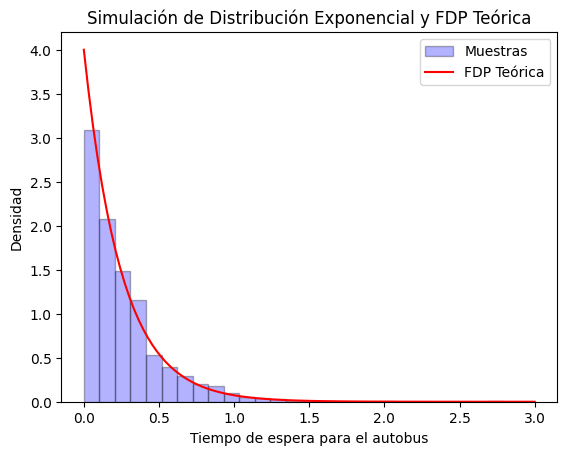

In [3]:
from scipy.stats import expon

print('Punto a')

x = 10/60 # Probabilidad de que un pasajero espere menos de 10 minutos por el próximo autobús (en horas)
lam = 4 # Buses por hora
scale=1/lam

# Metodo 1 (manual)
prob_exp_1=1-math. exp(-lam*x)
print(f"a1. Probabilidad de esperar menos de 10 minutos (manual): {prob_exp_1:.4f}")

# Metodo 2
prob_exp_2 = expon.cdf(x, scale=scale)
print(f"a2. Probabilidad de esperar menos de 10 minutos: {prob_exp_2:.4f}")

print('Punto b')

# Generar 1000 muestras aleatorias de la distribución exponencial
muestras = expon.rvs(scale=scale, size=1000)

# Configurar los bins del histograma
bins = np.linspace(0, 3, 30)

# Dibujar el histograma de las muestras
plt.hist(muestras, bins=bins, alpha=0.3, label='Muestras', density=True, color='blue',edgecolor='black')

# Generar valores x para la FDP
x = np.linspace(0, 3, 100)

# Calcular la FDP para estos valores x
fdp = expon.pdf(x, scale=scale)

# Dibujar la FDP
plt.plot(x, fdp, 'r-', label='FDP Teórica')

# Añadir títulos y etiquetas
plt.title('Simulación de Distribución Exponencial y FDP Teórica')
plt.xlabel('Tiempo de espera para el autobus')
plt.ylabel('Densidad')
plt.legend()

# Mostrar el gráfico
plt.show()



##### Conclusión

Probabilidad de esperar menos de 10 minutos:

Como se muestra en la salida impresa, la probabilidad de esperar menos de 10 minutos por el próximo autobús es de aproximadamente 0.4866, o un 48.66%. Esto significa que, en casi la mitad de las veces, un pasajero esperará menos de 10 minutos por el siguiente autobús.

Interpretación del histograma y la curva de la FDP:

El histograma muestra los 1000 tiempos de espera simulados. La forma decreciente del histograma concuerda con la naturaleza de la distribución exponencial, donde los tiempos de espera cortos son más probables, y a medida que aumenta el tiempo, la probabilidad de esperar más tiempo disminuye.


#### Ejercicio 2: Puntuaciones en un Examen

Las puntuaciones de un examen siguen una distribución normal con una media de 70 y una desviación estándar de 8.

a) ¿Cuál es la probabilidad de que un estudiante obtenga una puntuación entre 65 y 85?

b) Si se requiere estar en el 10% superior para aprobar con honores, ¿cuál es la puntuación mínima necesaria?

c) Genera en Python una muestra aleatoria de 500 puntuaciones y representa su distribución mediante un histograma.

a. probabilidad de que un estudiante obtenga una puntuación entre 65 y 85: 0.7036
b. Puntuación mínima necesaria para estar en el 10% superior: 80.2524
c. muestra aleatoria de 500 puntuaciones


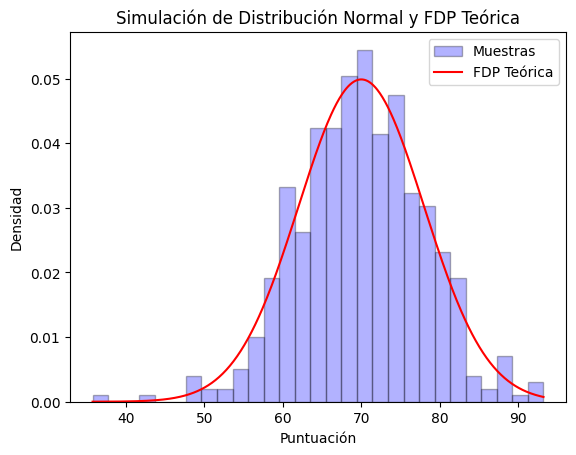

In [4]:
from scipy.stats import norm

media = 70
dev = 8

prob_norm_2a =norm.cdf(85, loc=media, scale=dev)- norm.cdf(65, loc=media, scale=dev)
print(f"a. probabilidad de que un estudiante obtenga una puntuación entre 65 y 85: {prob_norm_2a:.4f}")

prob_norm_2b =norm.ppf(0.9, loc=media, scale=dev)
print(f"b. Puntuación mínima necesaria para estar en el 10% superior: {prob_norm_2b:.4f}")

# Generar 500 muestras aleatorias de la distribución normal
muestras = norm.rvs(loc=media,scale=dev, size=500)

# Configurar los bins del histograma
bins = np.linspace(min(muestras), max(muestras), 30)

# Dibujar el histograma de las muestras
plt.hist(muestras, bins=bins, alpha=0.3, label='Muestras', density=True, color='blue', edgecolor='black')

# Dibujar la función de densidad teórica
x = np.linspace(min(muestras), max(muestras), 500)
pdf = norm.pdf(x, loc=media, scale=dev)
plt.plot(x, pdf, 'r-', label='FDP Teórica')

# Añadir títulos y etiquetas
plt.title('Simulación de Distribución Normal y FDP Teórica')
plt.xlabel('Puntuación')
plt.ylabel('Densidad')
plt.legend()

# Mostrar el gráfico
print('c. muestra aleatoria de 500 puntuaciones')
plt.show()

##### Conclusión

a. Probabilidad entre 65 y 85: La mayor parte de las puntuaciones de la simulación se encuentra dentro del rango de 65 a 85, lo que coincide con la probabilidad calculada de aproximadamente 70.4%. Esto indica que alrededor del 70% de los estudiantes obtendría puntuaciones en este intervalo.

b. Puntuación para el 10% superior: Para estar en el 10% superior y aprobar con honores, los estudiantes necesitan obtener una puntuación de al menos 80.25. Esto se puede ver en la gráfica, ya que una porción menor de las puntuaciones se encuentra por encima de 80, correspondiente al percentil 90 de la distribución.

c. Simulación y comparación con la distribución teórica: La curva roja representa la función de densidad teórica de la distribución normal y se ajusta bastante bien al histograma de las puntuaciones simuladas (barras azules). Esto valida que la simulación sigue la distribución normal esperada.

#### Ejercicio 3: Defectos en un Proceso de Manufactura

En una línea de producción, el número de defectos por metro de tela sigue una distribución de Poisson con una media de 2 defectos por metro.

a) ¿Cuál es la probabilidad de encontrar exactamente 3 defectos en un metro de tela?

b) ¿Cuál es la probabilidad de que haya al menos un defecto en un metro de tela?

c) Simula en Python el número de defectos en 1000 metros de tela y representa el histograma correspondiente.

a. probabilidad de encontrar exactamente 3 defectos en un metro de tela: 0.1804
b. probabilidad de que haya al menos un defecto en un metro de tela: 0.8647
c. histograma de número de defectos en 1000 metros de tela


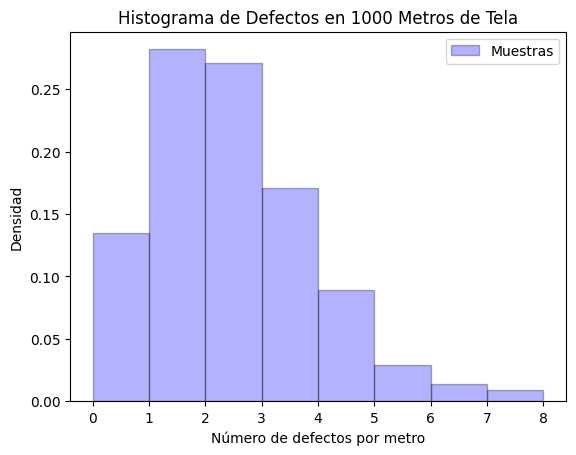

In [5]:
from scipy.stats import poisson
media=2

prom_poisson_3 = poisson.pmf(3,media)
print(f'a. probabilidad de encontrar exactamente 3 defectos en un metro de tela: {prom_poisson_3:.4f}')

prom_poisson_3 = 1 - poisson.pmf(0,media)
print(f'b. probabilidad de que haya al menos un defecto en un metro de tela: {prom_poisson_3:.4f}')

# c) Simulación: generar 1000 muestras aleatorias de la distribución de Poisson
muestras = poisson.rvs(mu=media, size=1000)

# Configurar los bins del histograma (valores discretos)
bins = np.arange(0, max(muestras) + 1)  # Bins discretos para valores de Poisson

# Dibujar el histograma de las muestras simuladas (sin normalización)
plt.hist(muestras, bins=bins, alpha=0.3, label='Muestras', density=True, color='blue', edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Histograma de Defectos en 1000 Metros de Tela')
plt.xlabel('Número de defectos por metro')
plt.ylabel('Densidad')
plt.legend()

# Mostrar el gráfico
print('c. histograma de número de defectos en 1000 metros de tela')
plt.show()

##### Conclusión
a. La probabilidad de encontrar exactamente 3 defectos en un metro de tela es 0.1804 (18.04%).

b. La probabilidad de encontrar al menos un defecto en un metro de tela es 0.8647 (86.47%). Esto refleja que la ocurrencia de al menos un defecto es bastante alta en comparación con la posibilidad de no encontrar ningún defecto.

c. El histograma muestra que el número de defectos sigue la forma de una distribución de Poisson con media 2. Los valores más frecuentes son 1 y 2 defectos por metro, y las frecuencias disminuyen progresivamente para números mayores de defectos.


#### Ejercicio 4: Vida Útil de una Batería

La vida útil (en horas) de una batería sigue una distribución gamma con forma 
k=3 y escala 
θ=500 horas.

a) ¿Cuál es la probabilidad de que una batería dure más de 1500 horas?

b) Calcula y representa en Python la función de densidad de probabilidad (PDF) de la distribución.

a. probabilidad de que una batería dure más de 1500 horas: 0.4232
b. función de densidad de probabilidad (DFP)


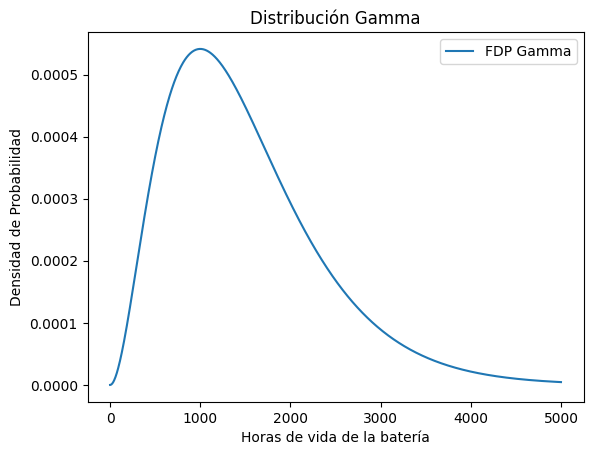

In [6]:
from scipy.stats import gamma

# Parámetros
alpha = 3
beta = 500

prob_gamma_4 =1 - gamma.cdf(1500, a=alpha, scale=beta)
print(f'a. probabilidad de que una batería dure más de 1500 horas: {prob_gamma_4:.4f}')

# Generar valores x para la FDP
x = np.linspace(0, 5000, 1000)
fdp = gamma.pdf(x, a=alpha, scale=beta)

# Crear la gráfica de la FDP
plt.plot(x, fdp, label='FDP Gamma')
plt.title('Distribución Gamma')
plt.xlabel('Horas de vida de la batería')
plt.ylabel('Densidad de Probabilidad')
plt.legend()

# Mostrar la gráfica
print('b. función de densidad de probabilidad (DFP)')
plt.show()

##### Conclusión
a. La probabilidad de que una batería dure más de 1500 horas es aproximadamente  0.4232 o un 42.32%. Esto significa que aproximadamente el 42% de las baterías durarán más de 1500 horas, lo que es razonable dado que el valor esperado de la vida útil es de:

𝑘 × 𝜃 = 3 × 500 = 1500

b. La mayor densidad de probabilidad se encuentra alrededor de las 1500 horas, lo que indica que es el valor más probable para la duración de la batería.

#### Ejercicio 5: Lluvias en una Región

El número de días de lluvia en un mes en una región sigue una distribución binomial con  n=30 días y una probabilidad diaria de lluvia de p=0.2.

a) ¿Cuál es la probabilidad de que llueva exactamente 8 días en un mes?

b) Simula en Python el número de días de lluvia durante un año (12 meses) y representa la distribución de frecuencias.

a. probabilidad de que llueva exactamente 8 días en un mes: 0.1106
b. Simulación número de días de lluvia durante un año


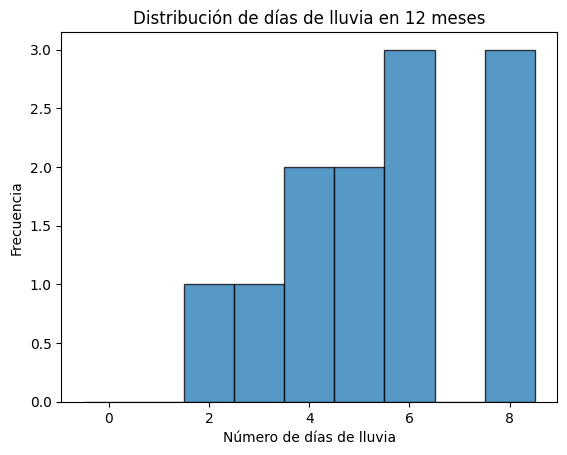

número de días de lluvia por mes: [8 3 5 6 4 8 6 6 4 2 8 5]


In [7]:
from scipy.stats import binom


prob_binom_5a=binom.pmf(k=8, n=30, p=0.2)
print(f'a. probabilidad de que llueva exactamente 8 días en un mes: {prob_binom_5a:.4f}')

prob_binom_5b = binom.rvs(n=30, p=0.2, size=12) 

# Representar la distribución de frecuencias
plt.hist(prob_binom_5b, bins=np.arange(0, max(prob_binom_5b)+2)-0.5, edgecolor='black', alpha=0.75)
plt.title('Distribución de días de lluvia en 12 meses')
plt.xlabel('Número de días de lluvia')
plt.ylabel('Frecuencia')
print('b. Simulación número de días de lluvia durante un año')
plt.show()

print(f'número de días de lluvia por mes: {prob_binom_5b}')

##### Conclusión

a. La probabilidad de que llueva exactamente 8 días en un mes es de aproximadamente 0.1106, lo que significa que hay un 11.06% de probabilidad de que llueva exactamente 8 días en un mes con 30 días y una probabilidad diaria de lluvia de 0.2.

b. En la simulación, los resultados obtenidos muestran la variabilidad en el número de días de lluvia a lo largo de 12 meses. Se observa que el número de días de lluvia por mes fluctúa por lo general, con valores que van desde 2 hasta 12 días.

#### Ejercicio 6: Control de Calidad en una Fábrica de Bombillas

Una fábrica produce bombillas que, según especificaciones, tienen una vida útil que sigue una distribución normal con una media de 800 horas y una desviación estándar de 50 horas. Un ingeniero sospecha que una nueva máquina está produciendo bombillas con una vida útil diferente. Para comprobarlo, toma una muestra aleatoria de 36 bombillas producidas por la nueva máquina y encuentra que la vida útil media es de 785 horas.

a) Plantee las hipótesis nula y alternativa para probar si la nueva máquina está produciendo bombillas con una vida útil diferente a la especificada.

b) Utilice un nivel de significancia del 5% para realizar la prueba de hipótesis.

c) Calcule el valor p de la prueba.

d) ¿Cuál es su conclusión respecto a la nueva máquina?

##### a. Planteamiento de Hipótesis

* **Hipótesis Nula ($H_0$)**: La media de la vida util de las bombillas producida con la nueva maquina es igual a 800. $H_0: \mu = 800$

* **Hipótesis Alternativa ($H_1$)**: La media de la vida util de las bombillas producida con la nueva maquina es diferente a 800. $H_1: \mu \neq 800$

In [8]:

import scipy.stats as stats

mu_0 = 800  # Media poblacional
sigma = 50  # Desviación estándar poblacional
n = 36  # Tamaño de la muestra
x_bar = 785  # Media de la muestra
alpha = 0.05  # Nivel de significancia

# Cálculo del estadístico Z de la muestra
Z_muestra = (x_bar - mu_0) / (sigma / (n ** 0.5))

# Cálculo del valor p para una prueba bilateral
p_valor_inf = norm.cdf(-1.7999999999999998, 0, 1)

# Cálculo del valor p para una prueba bilateral
p_valor_sup = norm.cdf(1.7999999999999998, 0, 1)

# Imprimir resultados
print(f"b. Estadístico Z de la muestra: {Z_muestra}")
print('c. ')
print(f"Valor p superior: {p_valor_sup}")
print(f"Valor p inferior: {p_valor_inf}")
print('d. ')

Valor_p=2*p_valor_inf<0.05
print(f'Prueba de valor p ({2*p_valor_inf: .4f}<0.05): {Valor_p}')

z_critico_inf = norm.ppf(0.025, 0, 1)
z_critico_sup = norm.ppf(0.975, 0, 1)
print(f'Metodo valor critico ({z_critico_inf: .2f}< z muestra >{z_critico_sup: .2f}): Z muestra :{Z_muestra: .2f}')


b. Estadístico Z de la muestra: -1.7999999999999998
c. 
Valor p superior: 0.9640696808870742
Valor p inferior: 0.03593031911292581
d. 
Prueba de valor p ( 0.0719<0.05): False
Metodo valor critico (-1.96< z muestra > 1.96): Z muestra :-1.80



##### Conclusión utilizando el valor Z crítico:
El estadístico Z calculado es -1.8, y el valor crítico para un nivel de significancia del 5% en una prueba bilateral es ±1.96. Dado que -1.8 se encuentra dentro del intervalo entre -1.96 y 1.96, **no rechazamos la hipótesis nula**. Esto significa que no hay evidencia suficiente para afirmar que la nueva máquina esté produciendo bombillas con una vida útil diferente a las especificaciones originales de 800 horas.

##### Conclusión utilizando el valor p:
El valor p calculado es 0.0718, lo cual es mayor que el nivel de significancia de 0.05. Dado que el valor p es mayor que 
𝛼, **no rechazamos la hipótesis nula**. Esto confirma que no hay suficiente evidencia para concluir que la vida útil de las bombillas producidas por la nueva máquina sea diferente a las especificaciones originales.

#### Ejercicio 7: Efectividad de un Nuevo Medicamento

Un laboratorio farmacéutico ha desarrollado un nuevo medicamento para reducir la presión arterial. Se sabe que la presión arterial sistólica de la población sigue una distribución normal con una media de 120 mmHg y una desviación estándar de 15 mmHg. Se administra el nuevo medicamento a una muestra de 25 pacientes, y se observa que la presión arterial media es de 112 mmHg.

a) Plantee las hipótesis nula y alternativa para determinar si el medicamento reduce significativamente la presión arterial.

b) Realice la prueba de hipótesis utilizando un nivel de significancia del 1%.

c) Calcule el valor p de la prueba.

d) Interprete los resultados y determine si el medicamento es efectivo.

##### a. Planteamiento de Hipótesis

* **Hipótesis Nula ($H_0$)**: La media de la presion arterial despues de suministrar el nuevo medicamento es menor a 120. $H_0: \mu \geq 120$

* **Hipótesis Alternativa ($H_1$)**: La media de la presion arterial despues de suministrar el nuevo medicamento es mayor o igual a 120. $H_1: \mu < 120$

In [9]:
import scipy.stats as stats

mu_0 = 120  # Media poblacional
sigma = 15  # Desviación estándar poblacional
n = 25  # Tamaño de la muestra
x_bar = 112  # Media de la muestra
alpha = 0.01  # Nivel de significancia

# Cálculo del estadístico Z de la muestra
Z_muestra = (x_bar - mu_0) / (sigma / (n ** 0.5))

# Cálculo del valor p para una prueba bilateral
p_valor = norm.cdf(-2.6666666666666665, 0, 1)


# Imprimir resultados
print(f"b. Estadístico Z de la muestra: {Z_muestra}")
print(f"c. Valor p: {p_valor}")
print('d. ')

prueba_valor_p=p_valor<0.01
print(f'Prueba de valor p ({p_valor: .4f}<0.01): {prueba_valor_p}, si es verdadero se rechaza')

z_critico = norm.ppf(0.01, 0, 1)
print(f'Metodo valor critico ({z_critico: .2f}< z muestra): Z muestra :{Z_muestra: .2f} si es menor se rechaza')

b. Estadístico Z de la muestra: -2.6666666666666665
c. Valor p: 0.0038303805675897365
d. 
Prueba de valor p ( 0.0038<0.01): True, si es verdadero se rechaza
Metodo valor critico (-2.33< z muestra): Z muestra :-2.67 si es menor se rechaza


#### Conclusión:
Valor p
valor 𝑝 = 0.0038 es menor que el nivel de significancia  𝛼 = 0.01. Esto significa que rechazamos la hipótesis nula.

valor crítico
-2.67 es menor que el valor crítico -2.33, lo que también indica que debemos rechazar la hipótesis nula.

Interpretación:
Dado que hemos **rechazado la hipótesis nula**, podemos concluir que hay evidencia suficiente para afirmar que el nuevo medicamento reduce significativamente la presión arterial.

#### Ejercicio 8: Tasas de Llegadas en un Centro de Llamadas

El número de llamadas que recibe un centro de atención al cliente sigue una distribución de Poisson con una media de 5 llamadas por minuto. El gerente implementa un nuevo sistema y desea saber si ha afectado la tasa de llamadas. Durante un periodo de 30 minutos, registra un total de 180 llamadas.

a) Plantee las hipótesis para probar si el nuevo sistema ha cambiado la tasa de llamadas.

b) Realice una prueba de hipótesis al nivel de significancia del 5%.

c) Determine si hay evidencia suficiente para concluir que la tasa de llamadas ha cambiado.

##### a. Planteamiento de Hipótesis

* **Hipótesis Nula ($H_0$)**: el nuevo sistema mantiene la misma tasa de llamadas de 5. $H_0: p = 5$

* **Hipótesis Alternativa ($H_1$)**: el nuevo sistema cambio la tasa de llamadas de 5. $H_1: p \neq 5$

In [10]:
# RESPUESTA B
# Nivel de significancia del 5% y valores críticos
alpha = 0.05

# Valores críticos para una prueba bilateral
z_critical = norm.ppf(1 - alpha/2)

z_critical

np.float64(1.959963984540054)

In [11]:
# RESPUESTA C

# Datos del problema
lambda_0 = 5  # media poblacional según la hipótesis nula (tasa de llamadas)
n = 30  # tiempo de observación en minutos
X = 180  # número total de llamadas registradas
alpha = 0.05  # nivel de significancia

# Calcular el estadístico Z
z = (X - lambda_0 * n) / np.sqrt(lambda_0 * n)

# Mostrar el valor del estadístico Z
print(f"Valor del estadístico Z: {z:.2f}")

# Parte c: Calcular el valor p de la prueba
# Como es una prueba bilateral, multiplicamos por 2 la probabilidad de la cola correspondiente
p_value = 2 * (1 - norm.cdf(abs(z)))

# Mostrar el valor p
print(f"Valor p: {p_value:.4f}")

Valor del estadístico Z: 2.45
Valor p: 0.0143


#### Conclusión

Hay suficiente evidencia para concluir que el nuevo sistema ha cambiado la tasa de llamadas del centro de atención al cliente, se rechaza la hipótesis nula

#### Ejercicio 9: Preferencia de Marca

Una empresa desea saber si la proporción de clientes que prefieren su marca ha aumentado después de una campaña publicitaria. Antes de la campaña, el 40% de los clientes prefería su marca. Después de la campaña, en una muestra de 200 clientes, 100 indican preferir su marca.

a) Establezca las hipótesis nula y alternativa.

b) Realice una prueba de hipótesis al nivel de significancia del 5%.

c) Calcule el valor p y concluya si la campaña fue efectiva en aumentar la preferencia de marca.

##### a. Planteamiento de Hipótesis

* **Hipótesis Nula ($H_0$)**: La proporción de clientes que prefieren su marca ha disminuido después de una campaña publicitaria a igual o menos del 40%. $H_0: p \leq 0.40$

* **Hipótesis Alternativa ($H_1$)**: La proporción de clientes que prefieren su marca ha aumentado después de una campaña publicitariaa mas del 40%. $H_1: > 0.4$

In [12]:
import scipy.stats as stats

p0 = 0.4  # proporcion poblacional
n = 200  # Tamaño de la muestra
p_bar = 0.5  # Media de la muestra
alpha = 0.05  # Nivel de significancia

# Cálculo del estadístico Z de la muestra
Z_muestra = (p_bar - p0) / math.sqrt((p0*(1-p0))/n)

# Cálculo del valor p para una prueba bilateral
p_valor = norm.sf(Z_muestra, 0, 1)


# Imprimir resultados
print(f"b. Estadístico Z de la muestra: {Z_muestra}")
print(f"c. Valor p: {p_valor}")
print('d. ')

prueba_valor_p=p_valor<alpha
print(f'Prueba de valor p ({p_valor: .4f}<{alpha}): {prueba_valor_p}, si es verdadero se rechaza')

z_critico = norm.ppf(1-alpha, 0, 1)
print(f'Metodo valor critico ({z_critico: .2f}> z muestra): Z muestra :{Z_muestra: .2f} si es mayor se rechaza')

b. Estadístico Z de la muestra: 2.886751345948128
c. Valor p: 0.0019462085613893183
d. 
Prueba de valor p ( 0.0019<0.05): True, si es verdadero se rechaza
Metodo valor critico ( 1.64> z muestra): Z muestra : 2.89 si es mayor se rechaza


#### Conclusion

Prueba de valor p: Como \( p = 0.0019 \) es menor que el nivel de significancia \( alpha = 0.05 ), **se rechaza la hipótesis nula**.

Método del valor crítico: Dado que el estadístico \( z = 2.89 \) es mayor que el valor crítico \( z_critico = 1.64 \), **se rechaza la hipótesis nula**.

Con base en ambas pruebas (valor p y valor crítico), hay suficiente evidencia estadística para concluir que la campaña publicitaria **fue efectiva en aumentar la proporción de clientes que prefieren la marca**.

#### Ejercicio 10: Evaluación de un Programa Educativo


Una escuela implementa un nuevo programa educativo y quiere evaluar su efectividad en las calificaciones de matemáticas. Históricamente, las calificaciones siguen una distribución normal con una media de 70 y una desviación estándar de 10. Después de implementar el programa, una muestra de 50 estudiantes tiene una calificación media de 73.

a) Formule las hipótesis nula y alternativa para determinar si el programa ha mejorado las calificaciones.

b) Utilice un nivel de significancia del 2% para realizar la prueba.

c) ¿El programa educativo ha tenido un impacto significativo en las calificaciones?

##### a. Planteamiento de Hipótesis

* **Hipótesis Nula ($H_0$)**: el nuevo programa educativo mantuvo o disminuyo la califacion media de los estudiantes. $H_0: \mu \leq 70$

* **Hipótesis Alternativa ($H_1$)**: el nuevo programa educativo aumento la califacion media de los estudiantes. $H_1: \mu > 70$

In [13]:
import scipy.stats as stats

mu_0 = 70  # Media poblacional
sigma = 10  # Desviación estándar poblacional
n = 50  # Tamaño de la muestra
x_bar = 73  # Media de la muestra
alpha = 0.02  # Nivel de significancia

# Cálculo del estadístico Z de la muestra
Z_muestra = (x_bar - mu_0) / (sigma / (n ** 0.5))

# Cálculo del valor p para una prueba bilateral
p_valor = norm.cdf(-2.6666666666666665, 0, 1)


# Imprimir resultados
print(f"b. Estadístico Z de la muestra: {Z_muestra}")
print(f"c. Valor p: {p_valor}")
print('d. ')

prueba_valor_p=p_valor<alpha
print(f'Prueba de valor p ({p_valor: .4f}<{alpha}): {prueba_valor_p}, si es verdadero se rechaza')

z_critico = norm.ppf(1-alpha, 0, 1)
print(f'Metodo valor critico ({z_critico: .2f}> z muestra): Z muestra :{Z_muestra: .2f} si es mayor se rechaza')

b. Estadístico Z de la muestra: 2.121320343559643
c. Valor p: 0.0038303805675897365
d. 
Prueba de valor p ( 0.0038<0.02): True, si es verdadero se rechaza
Metodo valor critico ( 2.05> z muestra): Z muestra : 2.12 si es mayor se rechaza


##### Conclusión:

Método del valor p: Comparado con el nivel de significancia \( alpha = 0.02 \), se observa que \( 0.0038 < 0.02 \).
Dado que el valor p es menor que \( alpha \), **rechazamos la hipótesis nula** \( H_0 \). Esto indica que el programa educativo ha tenido un impacto significativo en las calificaciones de matemáticas.

Método del valor crítico: Como \( z_muestra = 2.12 \) es **mayor** que el valor crítico \( z_critico = 2.05 \), también se rechaza la hipótesis nula. Por lo tanto, el programa educativo ha tenido un impacto significativo en las calificaciones de matemáticas.


#### Ejercicio 11: Efectividad de dos métodos de enseñanza

Un investigador educativo quiere comparar la efectividad de dos métodos de enseñanza diferentes en el rendimiento de los estudiantes. Se seleccionan aleatoriamente 30 estudiantes y se dividen en dos grupos de 15 estudiantes cada uno. El primer grupo es enseñado con el método tradicional y el segundo grupo con el nuevo método. Después de un mes, se les aplica un examen estandarizado.

Grupo 1 (Método Tradicional): Media = 75, Desviación estándar = 8
Grupo 2 (Nuevo Método): Media = 80, Desviación estándar = 6

a) Formule las hipótesis nula y alternativa para determinar si hay una diferencia significativa en las medias de los dos grupos.

b) Utilice una prueba t para muestras independientes con un nivel de significancia del 5% para analizar los datos.

c) Interprete los resultados y concluya si el nuevo método es más efectivo.

##### a. Planteamiento de Hipótesis

* **Hipótesis Nula ($H_0$)**: El nuevo metodo y el tradicional no tienen diferencia en el redimento de los estudiantes. $H_0: \mu 1 - \mu 2 = 0 $

* **Hipótesis Alternativa ($H_1$)**: El nuevo metodo y el tradicional  tienen diferencia en el redimento de los estudiantes.$H_1: \mu 1 - \mu 2\neq 0 $

In [14]:
x_bar1=75 #Media muestral grupo 1
x_bar2=80 #Media muestral grupo 2
s1=8 #Desviacion estandar muestral grupo 1
s2=6 #Desviacion estandar muestral grupo 2
n1=15 #Muestra grupo 1
n2=15 #Muestra grupo 2
d0 = 0  # Diferencia de medias bajo la hipótesis nula

# Fórmula de la t para muestras independientes
t = (x_bar1 - x_bar2) / math.sqrt((s1**2 / n1) + (s2**2 / n2))

# Grados de libertad aproximados para muestras independientes
df = (s1**2 / n1 + s2**2 / n2)**2 / ((s1**2 / n1)**2 / (n1 - 1) + (s2**2 / n2)**2 / (n2 - 1))

# Valor crítico para un nivel de significancia del 5% y 28 grados de libertad (dos colas)
alpha = 0.05
t_critico = stats.t.ppf(alpha/2, df)

# Cálculo del valor p para una prueba bilateral
p_valor = 2 * (stats.t.cdf(t, df))

# Imprimir los resultados
print(f"Grados de libertad: {df}")
print(f"Valor t calculado: {t}")
print(f"Valor crítico de t (α = 0.05, dos colas): {t_critico}")

print(f'Metodo valor critico ({t_critico: .2f}< t muestra): t muestra :{t: .2f} si es mayor no se rechaza')

prueba_valor_p=p_valor<alpha/2
print(f'Prueba de valor p ({p_valor: .4f}<{alpha/2}): {prueba_valor_p}, si es falso no se rechaza')

Grados de libertad: 25.964391691394653
Valor t calculado: -1.9364916731037085
Valor crítico de t (α = 0.05, dos colas): -2.0556666481901815
Metodo valor critico (-2.06< t muestra): t muestra :-1.94 si es mayor no se rechaza
Prueba de valor p ( 0.0638<0.025): False, si es falso no se rechaza


##### Conclusiones
Comparación con el Valor Crítico: Como **-1.94 es mayor que -2.06**, el valor t no cae en la región de rechazo, **no rechazamos la hipótesis nula**

Prueba del p-valor: Como **0.0638 es mayor que 0.025**, el p-valor no es lo suficientemente pequeño para rechazar la hipótesis nula, **no rechazamos la hipótesis nula**

Dado que ambos métodos (comparación con el valor crítico y el p-valor) llevan a la misma conclusión, **no hay evidencia suficiente para afirmar que existe una diferencia significativa en la efectividad entre el método tradicional y el nuevo método de enseñanza al nivel de significancia del 5%**. 


#### Ejercicio 12: Efecto de un programa de ejercicio en la presión arterial

Un médico quiere evaluar si un programa de ejercicio regular reduce la presión arterial sistólica en pacientes hipertensos. Se mide la presión arterial de 20 pacientes antes y después de participar en el programa durante 8 semanas.

Presión arterial media antes: 150 mmHg
Presión arterial media después: 140 mmHg
Desviación estándar de las diferencias: 10 mmHg
a) Establezca las hipótesis nula y alternativa para determinar si el programa reduce la presión arterial.

b) Realice una prueba t para muestras relacionadas (pareadas) al nivel de significancia del 1%.

c) ¿Es efectivo el programa de ejercicio para reducir la presión arterial?

##### a. Planteamiento de Hipótesis

* **Hipótesis Nula ($H_0$)**: El programa de ejercicio no reduce la presion arterial. $H_0: \mu 1 - \mu 2 \geq 0 $

* **Hipótesis Alternativa ($H_1$)**: El programa de ejercicio reduce la presion arterial..$H_1: \mu 1 - \mu 2 < 0$

In [15]:
x_bar1=150 #Media muestral grupo 1
x_bar2=140 #Media muestral grupo 2
n=20
d_bar = x_bar1 - x_bar2  # Media de las diferencias
error_stand =10  # desviacion estandar de las diferencias
d0 = 0  # Diferencia de medias bajo la hipótesis nula
alpha = 0.01 # Nivel de confianza

df=n-1
t_critico = stats.t.ppf(1-alpha,df)
print(f"Valor critico t: {t_critico}")

t_stat= (d_bar-d0)/(error_stand/np.sqrt(n))
print(f"Valor t calculado: {t_stat}")

p_valor=stats.t.sf(t_stat,df)
print(f"Valor t calculado: {p_valor}")

print(f'Metodo valor critico ({t_critico: .2f}< t muestra): t muestra :{t_stat: .2f} si es mayor no se rechaza')

prueba_valor_p=p_valor<alpha
print(f'Prueba de valor p ({p_valor: .4f}<{alpha}): {prueba_valor_p}, si es verdadero se rechaza')

Valor critico t: 2.5394831906222883
Valor t calculado: 4.47213595499958
Valor t calculado: 0.00013059668917013082
Metodo valor critico ( 2.54< t muestra): t muestra : 4.47 si es mayor no se rechaza
Prueba de valor p ( 0.0001<0.01): True, si es verdadero se rechaza


##### Conclusión

Método del Valor Crítico: Dado que el valor t calculado (4.472) es mayor que el valor crítico (2.539), rechazamos la hipótesis nula.

Método del Valor p: Dado que el valor p (0.00013) es menor que el nivel de significancia (0.01), también rechazamos la hipótesis nula.

En ambos métodos, podemos **rechazar la hipótesis nula** con un nivel de significancia del 1%. Esto indica que hay evidencia suficiente para afirmar que el programa de ejercicio **reduce la presión arterial sistólica** en pacientes hipertensos.



#### Ejercicio 14: Asociación entre Género y Preferencia de Producto (Prueba Chi-cuadrado)

Una empresa desea saber si existe una asociación entre el género de los consumidores y su preferencia por tres tipos de productos: A, B y C. Se realiza una encuesta a 200 personas y se obtienen los siguientes resultados:

|            | Producto A | Producto B | Producto C | Total |
|------------|------------|------------|------------|-------|
| **Hombres**| 40         | 30         | 20         | 90    |
| **Mujeres**| 20         | 50         | 40         | 110   |
| **Total**  | 60         | 80         | 60         | 200   |

a) Formule las hipótesis nula y alternativa para determinar si hay una asociación significativa entre el género y la preferencia de producto.

b) Realice una prueba chi-cuadrado de independencia al nivel de significancia del 5%.

c) Interprete los resultados y concluya si existe una asociación significativa entre el género y la preferencia de producto.


##### a. Planteamiento de Hipótesis

* **Hipótesis Nula ($H_0$)**: No existe una asociación significativa entre el género de los consumidores y su preferencia de producto. Es decir, las variables género y preferencia de producto son independientes.

* **Hipótesis Alternativa ($H_1$)**: Existe una asociación significativa entre el género de los consumidores y su preferencia de producto. Es decir, las variables género y preferencia de producto no son independientes.

In [16]:
from scipy.stats import chi2_contingency, chi2 as chi2_dist

# Datos observados
data = [[40, 30, 20], [20, 50, 40]]
df = pd.DataFrame(data, columns=["Producto A", "Producto B", "Producto C"], index=["Hombres", "Mujeres"])

# Prueba Chi-cuadrado de independencia
chi2, p, dof, expected = chi2_contingency(df)

# Valor crítico de Chi-cuadrado
alpha = 0.05
chi2_critical = chi2_dist.ppf(1 - alpha, dof)

# Resultados
print("Estadístico Chi-cuadrado calculado:", chi2)
print("Valor crítico Chi-cuadrado:", chi2_critical)
print("p-valor:", p)
print("Grados de libertad:", dof)
print("Valores esperados:")
print(pd.DataFrame(expected, columns=df.columns, index=df.index))


Estadístico Chi-cuadrado calculado: 16.4983164983165
Valor crítico Chi-cuadrado: 5.991464547107979
p-valor: 0.00026147856449482056
Grados de libertad: 2
Valores esperados:
         Producto A  Producto B  Producto C
Hombres        27.0        36.0        27.0
Mujeres        33.0        44.0        33.0


### Conclusión

Metodo valor critico: el valor Chi-cuadrado calculado es mayor que el valor crítico, **rechazamos la hipótesis nula** y concluimos que existe una asociación significativa entre el género y la preferencia de producto.

Metodo valor p: el p valor es menor a alpha (0,05), **rechazamos la hipótesis nula**y concluimos que existe una asociación significativa entre el género y la preferencia de producto.




### Ejercicio 13: Comparación de salarios entre dos departamentos

En una empresa, se quiere saber si existe una diferencia en los salarios promedio entre el departamento de ventas y el departamento de marketing. Se toman muestras aleatorias de empleados de ambos departamentos.

Ventas (n = 25): Media = $50,000, Desviación estándar = $5,000
Marketing (n = 30): Media = $52,000, Desviación estándar = $6,000
a) Plantee las hipótesis para probar si hay una diferencia significativa en los salarios medios de los dos departamentos.

b) Realice una prueba t para muestras independientes con un nivel de significancia del 5%, asumiendo que las varianzas son iguales.

c) Concluya si hay una diferencia significativa en los salarios entre los dos departamentos.

### Planteamiento de las hipótesis

$$H_0 : \mu_v = \mu_m$$

$$H_1 : \mu_v \neq \mu_m$$

In [17]:
### RESPUESTA B

### RESPUESTA B
import numpy as np
from scipy import stats
# Datos
media_ventas = 50000
media_marketing = 52000
desviacion_ventas = 5000
desviacion_marketing = 6000
n_ventas = 25
n_marketing = 30
alpha = 0.05
# Calcular la diferencia entre medias
diferencia_medias = media_ventas - media_marketing

# Calcular la parte del denominador
denominador = np.sqrt((desviacion_ventas**2 / n_ventas) + (desviacion_marketing**2 / n_marketing))

# Calcular el estadístico t
t_stat = diferencia_medias / denominador

# Calcular grados de libertad
df = n_ventas + n_marketing - 2

# Valor crítico para 28 grados de libertad y alfa = 0.05 (bilateral)
valor_critico = stats.t.ppf(1 - alpha/2, df)

# Mostrar resultados
print(f'Estadístico t: {t_stat:.2f}')
print(f'Grados de libertad: {df}')
print(f'Valor crítico de t: ±{valor_critico}')


Estadístico t: -1.35
Grados de libertad: 53
Valor crítico de t: ±2.0057459953178687


### Conclusión

Debido a que el t estadístico es menor que el valor crítico de t, no hay suficiente evidencia para rechazar la hiótesis nula, por lo que no hay una diferencia significativa entre los salarios de los dos departamentos.

### Ejercicio 14: Asociación entre Género y Preferencia de Producto (Prueba Chi-cuadrado)

Una empresa desea saber si existe una asociación entre el género de los consumidores y su preferencia por tres tipos de productos: A, B y C. Se realiza una encuesta a 200 personas y se obtienen los siguientes resultados:

Producto A	Producto B	Producto C	Total
Hombres	40	30	20	90
Mujeres	20	50	40	110
Total	60	80	60	200



a) Formule las hipótesis nula y alternativa para determinar si hay una asociación significativa entre el género y la preferencia de producto.

b) Realice una prueba chi-cuadrado de independencia al nivel de significancia del 5%.

c) Interprete los resultados y concluya si existe una asociación significativa entre el género y la preferencia de producto.

#### Planteamiento de las hipótesis

##### Hipótesis nula (H₀):
No hay una asociación significativa entre el género y la preferencia de producto, es decir, son independientes.

$$
H_0: \text{El género y la preferencia de producto son independientes.}
$$

##### Hipótesis alternativa (H₁):
Existe una asociación significativa entre el género y la preferencia de producto, es decir, no son independientes.

$$
H_1: \text{El género y la preferencia de producto no son independientes.}
$$


In [18]:
### RESPUESTA B

import numpy as np
from scipy import stats
from scipy.stats import chi2

# Tabla de contingencia (observada)
observed = np.array([[40, 30, 20], [20, 50, 40]])

# Realizar la prueba chi-cuadrado
chi2_stat, p_val, dof, expected = stats.chi2_contingency(observed)

# Nivel de significancia
alpha = 0.05

# Calcular el valor crítico usando la función chi2.ppf
valor_critico = chi2.ppf(1 - alpha, dof)

# Mostrar resultados
print(f'Estadístico chi-cuadrado: {chi2_stat:.2f}')
print(f'Valor p: {p_val:.4f}')
print(f'Grados de libertad: {dof}')
print(f'Valor crítico de chi-cuadrado (α = 0.05): {valor_critico:.2f}')
print('Frecuencias esperadas:')
print(expected)

Estadístico chi-cuadrado: 16.50
Valor p: 0.0003
Grados de libertad: 2
Valor crítico de chi-cuadrado (α = 0.05): 5.99
Frecuencias esperadas:
[[27. 36. 27.]
 [33. 44. 33.]]


#### Conclusión

Debido a que el valor crítico de chi-cuadrado es menor al estadístico chi-cuadrado, hay suficiente evidencia para concluir que si existe una asociación significativa entre el género y la preferencia de producto.

### Ejercicio 15: Comparación de Varianzas entre Dos Procesos de Producción (Prueba F)

Una fábrica tiene dos máquinas, Máquina 1 y Máquina 2, que producen el mismo componente. Se sospecha que hay diferencias en la consistencia (variabilidad) de las piezas producidas por cada máquina. Para evaluar esto, se toman muestras aleatorias de las dimensiones de las piezas producidas por cada máquina.

Máquina 1: n = 20, Varianza muestral = 1.5 mm²
Máquina 2: n = 25, Varianza muestral = 0.9 mm²
a) Establezca las hipótesis nula y alternativa para determinar si las varianzas de los dos procesos son significativamente diferentes.

b) Realice una prueba F al nivel de significancia del 5% para comparar las varianzas.

c) Concluya si hay diferencias significativas en la variabilidad de las piezas producidas por las dos máquinas.

#### Planteamiento de las hipótesis

##### Hipótesis nula (H₀):
Las varianzas de las dos máquinas son iguales, es decir, no hay diferencia significativa en la variabilidad de las piezas producidas.

$$
H_0: \sigma_1^2 = \sigma_2^2
$$

##### Hipótesis alternativa (H₁):
Las varianzas de las dos máquinas son diferentes, es decir, hay una diferencia significativa en la variabilidad de las piezas producidas.

$$
H_1: \sigma_1^2 \neq \sigma_2^2
$$

In [ ]:
from scipy.stats import f

# Datos del ejercicio
varianza_m1 = 1.5  # Varianza de la Máquina 1
varianza_m2 = 0.9  # Varianza de la Máquina 2
n1 = 20  # Tamaño de la muestra de la Máquina 1
n2 = 25  # Tamaño de la muestra de la Máquina 2

# Calcular el estadístico F
F_stat = varianza_m1 / varianza_m2

# Grados de libertad
df1 = n1 - 1  # Grados de libertad para Máquina 1
df2 = n2 - 1  # Grados de libertad para Máquina 2

# Nivel de significancia
alpha = 0.05

# Calcular los valores críticos para una prueba bilateral (dividimos el nivel de significancia en dos colas)
valor_critico_superior = f.ppf(1 - alpha / 2, df1, df2)
valor_critico_inferior = f.ppf(alpha / 2, df1, df2)

# Mostrar los resultados
print(f'Estadístico F calculado: {F_stat:.4f}')
print(f'Valor crítico superior (α/2 = 0.025): {valor_critico_superior:.4f}')
print(f'Valor crítico inferior (α/2 = 0.025): {valor_critico_inferior:.4f}')

##### Conclusión

El valor calculado de F (1.67) está dentro del rango de aceptación 
[0.41,2.35], es decir, no supera el valor crítico superior ni cae por debajo del valor crítico inferior.
Por esta razón no podemos rechazar la hipótesis nula. 